In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
def get_R2_features(model,test=True): 
    #X: global  
    features=list(X)
    features.remove("three")
    
    R_2_train=[]
    R_2_test=[]

    for feature in features:
        model.fit(X_train[[feature]],y_train)
        
        R_2_test.append(model.score(X_test[[feature]],y_test))
        R_2_train.append(model.score(X_train[[feature]],y_train))
        
    plt.bar(features,R_2_train,label="Train")
    plt.bar(features,R_2_test,label="Test")
    plt.xticks(rotation=90)
    plt.ylabel("$R^2$")
    plt.legend()
    plt.show()
    print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R_2_train)),str(np.mean(R_2_test))) )
    print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R_2_train)),str(np.max(R_2_test))) )

In [3]:
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

    plt.title('Actual vs Fitted Values')
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [4]:
data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv')
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

In [6]:
data.describe()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.097561,0.902439,0.819512,0.180488,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,...,98.756585,2555.565854,126.907317,3.329756,104.117073,174.049268,65.907805,25.219512,30.751220,13276.710571
std,0.297446,0.297446,0.385535,0.385535,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,...,6.021776,520.680204,41.642693,0.270844,39.544167,12.337289,2.145204,6.542142,6.886443,7988.852332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,86.600000,1488.000000,61.000000,2.540000,48.000000,141.100000,60.300000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,94.500000,2145.000000,97.000000,3.150000,70.000000,166.300000,64.100000,19.000000,25.000000,7788.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,97.000000,2414.000000,120.000000,3.310000,95.000000,173.200000,65.500000,24.000000,30.000000,10295.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,102.400000,2935.000000,141.000000,3.580000,116.000000,183.100000,66.900000,30.000000,34.000000,16503.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,120.900000,4066.000000,326.000000,3.940000,288.000000,208.100000,72.300000,49.000000,54.000000,45400.000000


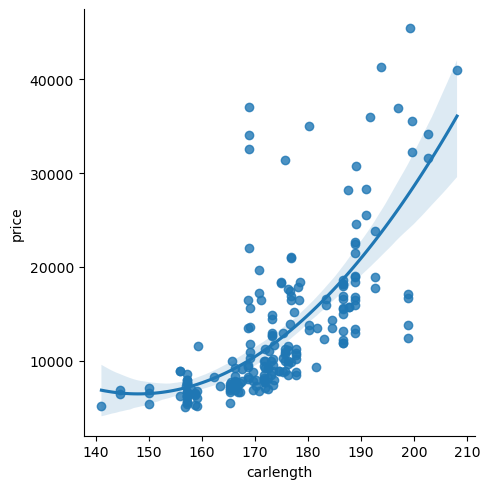

In [25]:
sns.lmplot(data=data,x='carlength',y='price',order=2)

In [26]:
X = data.drop('price',axis=1)
y = data.price

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [30]:
pred = model.predict(X_test)

In [31]:
model.score(X_test,y_test)

0.8478797750436009

C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

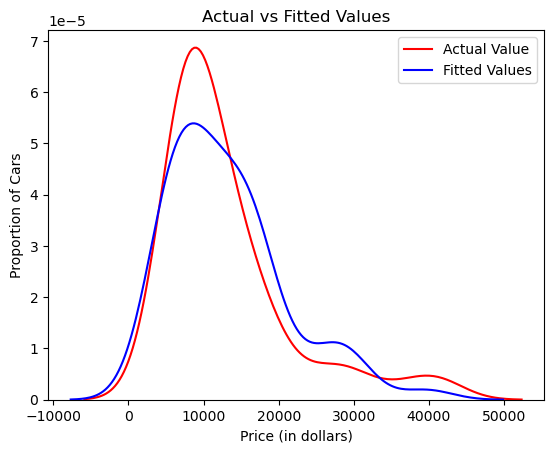

In [32]:
plot_dis(y_test,pred)

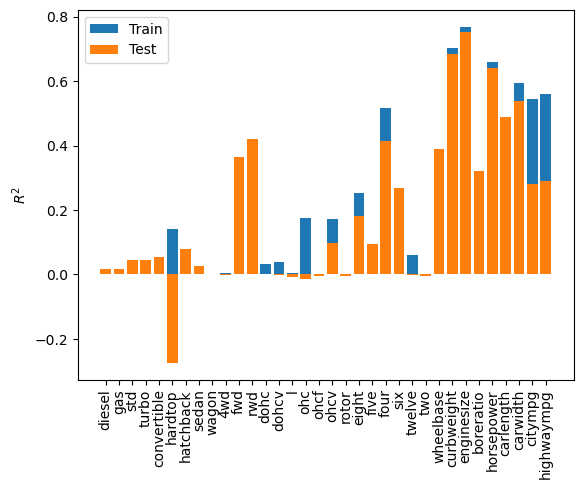

Training R^2 mean value 0.21817773426877918 Testing R^2 mean value 0.1824149303513927 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [33]:
get_R2_features(model)

0.9262722224294516
0.8419174509630339


C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

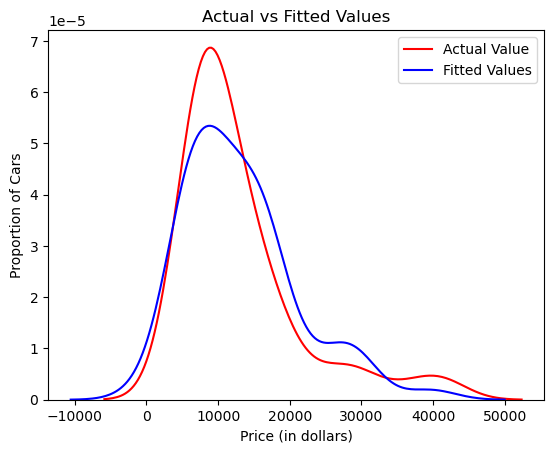

In [34]:
pipe = Pipeline([('ss',StandardScaler()),('lr',LinearRegression())])
pipe.fit(X_train,y_train)
print(pipe.score(X_train,y_train))
print(pipe.score(X_test,y_test))
pred = pipe.predict(X_test)
plot_dis(y_test,pred)

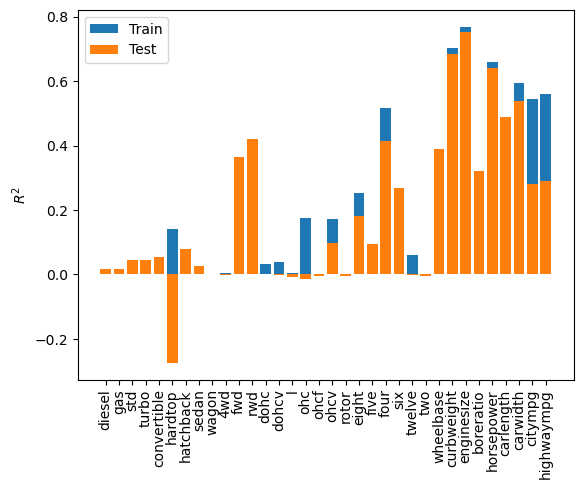

Training R^2 mean value 0.21817773426877915 Testing R^2 mean value 0.18241493035139264 
Training R^2 max value 0.7686929078033782 Testing R^2 max value 0.7534902447506853 


In [35]:
get_R2_features(pipe)

In [39]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [44]:
X_tr_poly = poly_features.fit_transform(X_train)
X_ts_poly = poly_features.transform(X_test)

In [45]:
model.fit(X_tr_poly,y_train)

LinearRegression()

In [47]:
pred = model.predict(X_tr_poly)

In [48]:
print(model.score(X_tr_poly,y_train))
print(model.score(X_ts_poly,y_test))

0.998531849797585
-36729.958502235706


In [65]:
Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [66]:
param_grid = {
    "polynomial__degree": [1, 2, 3],
}

In [67]:
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [68]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
search.fit(X_test,y_test)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LinearRegression())]),
             n_jobs=1, param_grid={'polynomial__degree': [1, 2, 3]})

In [70]:
best = search.best_estimator_

In [71]:
print(search.best_params_)

{'polynomial__degree': 1}


In [59]:
best.score(X_test,y_test)

0.9676510618958535

C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\lenov\AppData\Local\Temp\ipykernel_10360\4156269868.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

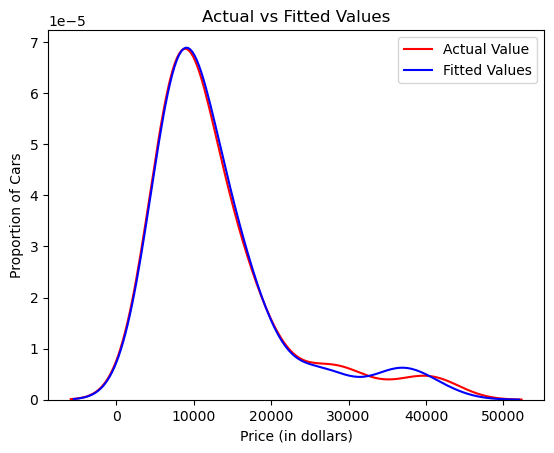

In [60]:
pred = best.predict(X_test)
plot_dis(y_test,pred)

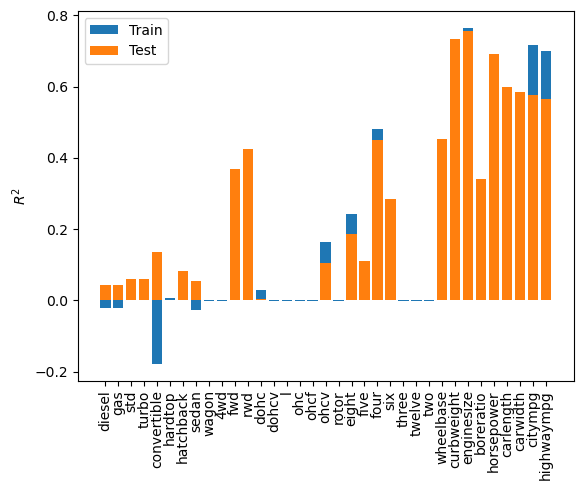

Training R^2 mean value 0.1870832324992052 Testing R^2 mean value 0.22041671563371837 
Training R^2 max value 0.765323637379124 Testing R^2 max value 0.7565151400968062 


In [64]:
features = list(X)
R2_train = []
R2_test = []

for feature in features:
    param_grid = {
        "polynomial__degree": [ 1, 2,3,4,5],
        "model__positive":[True, False]
    }
    Input=[ ('polynomial', PolynomialFeatures(include_bias=False,degree=2)), ('model',LinearRegression())]
    pipe=Pipeline(Input)
    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X_test[[feature]],y_test)
    best = search.best_estimator_
    R2_train.append(best.score(X_train[[feature]],y_train))
    R2_test.append(best.score(X_test[[feature]],y_test))
    
plt.bar(features,R2_train,label="Train")
plt.bar(features,R2_test,label="Test")
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.legend()
plt.show()    
print("Training R^2 mean value {} Testing R^2 mean value {} ".format(str(np.mean(R2_train)),str(np.mean(R2_test))))
print("Training R^2 max value {} Testing R^2 max value {} ".format(str(np.max(R2_train)),str(np.max(R2_test))))